In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

In [3]:
res=defaultdict(lambda : defaultdict(dict))

In [9]:
res["work95"]["1src"]["1rnd"] = pd.read_csv("i_bird_n_95_1src_1rnd_aucs.csv")

In [4]:
res["work95"]["1src"]["lastobs"] = pd.read_csv("i_bird_n_95_1src_lastobs_aucs.csv")

In [11]:
res["work95"]["2src"]["lastobs"] = pd.read_csv("i_bird_n_95_2src_lastobs_aucs.csv")

In [12]:
res["RRG"]["1src"]["1rnd"] = pd.read_csv("RRG_n_100_1src_1rnd_aucs.csv")

In [5]:
res["RRG"]["1src"]["lastobs"] = pd.read_csv("RRG_n_100_1src_lastobs_aucs.csv")

In [14]:
res["RRG"]["2src"]["lastobs"] = pd.read_csv("RRG_n_100_2src_lastobs_aucs.csv")

In [6]:
res["proximity"]["1src"]["lastobs"] = pd.read_csv("proximity_n_100_1src_lastobs_aucs.csv")

In [7]:
def stats(x):
    return np.nanmean(x), np.nanstd(x)/np.sqrt(np.prod(x.shape)-np.isnan(x).sum())

In [8]:
stats(np.random.randn(2000))

(0.040254052262795166, 0.022183511152324326)

In [9]:
name_conv = dict(zip(res["RRG"]["1src"]["lastobs"].keys(),["BP","ANN","MF","CT"]))
name_conv

{'sib_psus60': 'BP',
 'sib_psus70_psrc2': 'ANN',
 'ann_psus06_4lpow': 'MF',
 'ann_psus07_4lpow_psrc2': 'CT'}

In [55]:
stats(np.random.randn(10000))

(0.007537347228175814, 0.010031767763185819)

work95 1src lastobs
sib_psus70_psrc2          0.886 \pm 0.005
ann_psus07_4lpow_psrc2    0.889 \pm 0.005
ann_psus07_3lpow_psrc2    0.889 \pm 0.005
MF                        0.796 \pm 0.007
CT                        0.790 \pm 0.006
dtype: object


RRG 1src lastobs
sib_psus60                0.708 \pm 0.009
sib_psus70_psrc2          0.711 \pm 0.010
ann_psus06_4lpow          0.701 \pm 0.010
ann_psus07_4lpow_psrc2    0.707 \pm 0.010
ann_psus07_3lpow_psrc2    0.710 \pm 0.010
MF                        0.704 \pm 0.010
CT                        0.685 \pm 0.009
dtype: object


proximity 1src lastobs
sib_psus70_psrc2          0.733 \pm 0.010
ann_psus07_4lpow_psrc2    0.733 \pm 0.010
ann_psus07_3lpow_psrc2    0.734 \pm 0.010
MF                        0.724 \pm 0.009
CT                        0.711 \pm 0.008
dtype: object




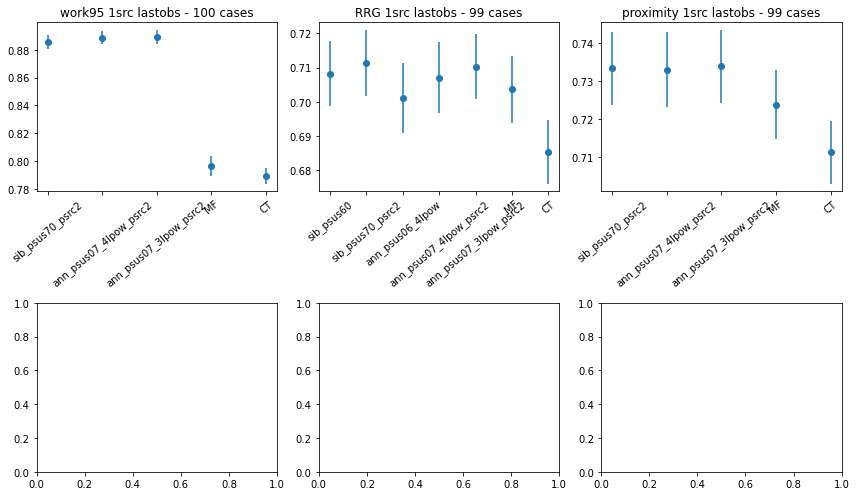

In [13]:
fig, axs = plt.subplots(2,3, figsize=(12,7))
axis = axs.flatten()
axs_idx = 0
for net, d1 in res.items():
    for src, d2 in d1.items():
        for obs, vals in d2.items():
            #print(len(vals))
            
            print("{} {} {}".format(net, src, obs))
            meanvar = vals.agg(stats)#.rename(columns=name_conv)
            v = meanvar.T
            print(
            meanvar.apply(lambda x: "{:5.3f} \pm {:5.3f}".format(x[0], x[1]), axis=0)
            )
            maxis = axis[axs_idx]
            x_pos=range(len(v))
            maxis.errorbar(x_pos, v[0], yerr=v[1], fmt="o")
            maxis.set_xticks(x_pos)
            maxis.set_xticklabels(v.index, rotation=40)
            maxis.set_title("{} {} {} - {} cases".format(net, src, obs, len(vals)))
            #print(v.apply())
            axs_idx+=1
            print("\n")
plt.tight_layout()
fig.savefig("Avg_auc.svg", bbox_inches="tight")

In [ ]:
fig.savefig()

In [20]:
maxis.set_xticklabels

,0,1
sib_psus60,0.668750,0.000874
ann_psus06_4lpow,0.662903,0.000890
MF,0.671186,0.000882
CT,0.659430,0.000832


In [46]:
meanvar.apply(lambda x: "{:5.4f} \pm {:5.4f}".format(x[0], x[1]), axis=0)

sib_psus60          0.6688 \pm 0.0009
ann_psus06_4lpow    0.6629 \pm 0.0009
MF                  0.6712 \pm 0.0009
CT                  0.6594 \pm 0.0008
dtype: object

In [44]:
np.mean(vals["sib_psus60"])

0.8776183260877327

In [45]:
np.std(vals["sib_psus60"])/len(vals)

0.0004951556291758689

In [43]:
vals = res["work95"]["2src"]["lastobs"]